In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.linear_model
import sklearn.preprocessing 

In [187]:
text ='orders_data.csv'

data =pd.read_csv(text)
data.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [188]:
data['cost price'].values

array([240, 600,  10, ..., 220,  30, 210], dtype=int64)

In [189]:
data.sort_values(by ='Category', ascending=True)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
8133,8134,29-11-2022,Standard Class,Corporate,United States,Dallas,Texas,75081,Central,Furniture,Furnishings,FUR-FU-10003708,60,70,3,4
1903,1904,12-02-2022,First Class,Corporate,United States,Springfield,Oregon,97477,West,Furniture,Chairs,FUR-CH-10000155,430,480,2,3
6151,6152,23-12-2022,Second Class,Home Office,United States,San Francisco,California,94110,West,Furniture,Bookcases,FUR-BO-10004218,1030,1200,10,3
6153,6154,04-03-2022,First Class,Corporate,United States,Philadelphia,Pennsylvania,19120,East,Furniture,Furnishings,FUR-FU-10001876,50,50,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,1845,15-05-2023,Standard Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Accessories,TEC-AC-10003027,80,90,3,5
3921,3922,26-01-2022,Second Class,Consumer,United States,Chicago,Illinois,60610,Central,Technology,Phones,TEC-PH-10001299,310,360,3,4
6173,6174,02-11-2022,Standard Class,Home Office,United States,Springfield,Missouri,65807,Central,Technology,Accessories,TEC-AC-10003237,20,20,2,5
8348,8349,28-01-2023,Standard Class,Corporate,United States,Lawrence,Massachusetts,1841,East,Technology,Phones,TEC-PH-10001300,170,210,10,4


In [190]:
data.groupby('Ship Mode').aggregate({'Category':'count', 'cost price':np.mean,'List Price':'mean'}).sort_values(by ='List Price', ascending=False)

,Category,cost price,List Price
Ship Mode,,,
Not Available,4,572.500000,672.500000
Same Day,543,207.661142,236.390424
Second Class,1945,206.473008,236.020566
First Class,1538,200.773732,228.387516
Standard Class,5962,198.768870,227.203958
unknown,1,60.000000,70.000000


<AxesSubplot:xlabel='Ship Mode'>

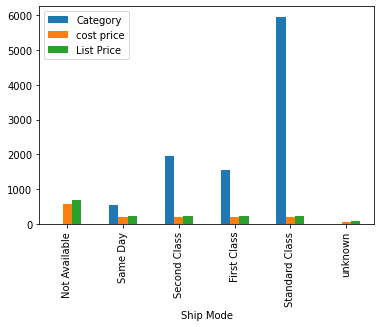

In [191]:
data.groupby('Ship Mode').aggregate({'Category':'count', 'cost price':np.mean,'List Price':'mean'}).sort_values(by ='List Price', ascending=False).plot(kind = 'bar')

In [192]:
data.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [193]:
data.describe()

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,201.189714,229.756854,3.789574,3.484090
std,2885.163629,32063.693350,537.743203,623.245839,2.225110,1.114211
min,1.000000,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,99301.000000,18110.000000,22640.000000,14.000000,5.000000


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [195]:
x = data['List Price'].values
x

array([260, 730,  10, ..., 260,  30, 240], dtype=int64)

In [196]:
data.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [197]:
y = data[['Quantity','Discount Percent']].values
y

array([[2, 2],
       [3, 3],
       [2, 5],
       ...,
       [2, 2],
       [4, 3],
       [2, 3]], dtype=int64)

In [198]:
data.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [199]:
(
     data.query('City == "Henderson" and Category =="Furniture"').
     assign(Revenue = data["List Price"] * data["Quantity"]).head(2)
)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Revenue
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,520
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2190


In [200]:
data[data['cost price']>200]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
7,8,25-01-2022,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
10,11,31-03-2023,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,FUR-TA-10001539,1470,1710,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,9969,15-04-2023,Standard Class,Consumer,United States,Plainfield,New Jersey,7060,East,Office Supplies,Binders,OFF-BI-10004600,700,740,2,3
9973,9974,07-03-2023,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10004080,230,270,5,4
9979,9980,12-10-2023,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10002026,410,440,14,3
9991,9992,07-08-2022,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2


In [201]:
len(data[data['cost price']>200])

2305

In [202]:
data.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [203]:
data = data.rename(columns={'cost price':'Cost Price'})
data.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Cost Price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [204]:
names = ['Price', 'Product','Quantity']
# data[data.columns.isin(names)]

In [205]:
data2 = data.iloc[:,:3].head()
data2

,Order Id,Order Date,Ship Mode
0,1,01-03-2023,Second Class
1,2,15-08-2023,Second Class
2,3,10-01-2023,Second Class
3,4,18-06-2022,Standard Class
4,5,13-07-2022,Standard Class


In [206]:
data2.loc[::-1].reset_index(drop=True).head()

,Order Id,Order Date,Ship Mode
0,5,13-07-2022,Standard Class
1,4,18-06-2022,Standard Class
2,3,10-01-2023,Second Class
3,2,15-08-2023,Second Class
4,1,01-03-2023,Second Class


In [207]:
data2

,Order Id,Order Date,Ship Mode
0,1,01-03-2023,Second Class
1,2,15-08-2023,Second Class
2,3,10-01-2023,Second Class
3,4,18-06-2022,Standard Class
4,5,13-07-2022,Standard Class


In [208]:
data3 = data.apply(pd.to_numeric, errors='coerce')

In [209]:
data['List Price']

0       260
1       730
2        10
3       960
4        20
       ... 
9989     30
9990     90
9991    260
9992     30
9993    240
Name: List Price, Length: 9994, dtype: int64

In [210]:
data['List Price'].apply(pd.to_numeric,errors='coerce')

0       260
1       730
2        10
3       960
4        20
       ... 
9989     30
9990     90
9991    260
9992     30
9993    240
Name: List Price, Length: 9994, dtype: int64

In [211]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  Cost Price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 6.9 MB


In [212]:
data.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'Cost Price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [213]:
counts = data.State.value_counts()
counts.head(2)

California    2001
New York      1128
Name: State, dtype: int64

In [214]:
counts.nlargest(5)

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

In [215]:
counts.nlargest(3).index

Index(['California', 'New York', 'Texas'], dtype='object')

In [216]:
data.rank(method='max').head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Cost Price,List Price,Quantity,Discount Percent
0,1.0,74.0,4030.0,5191.0,9994.0,2736.0,4138.0,3897.0,6791.0,2121.0,3788.0,52.0,7996.0,7890.0,3301.0,2523.0
1,2.0,4838.0,4030.0,5191.0,9994.0,2736.0,4138.0,3897.0,6791.0,2121.0,4405.0,277.0,9226.0,9277.0,5710.0,5065.0


In [217]:
data.iloc[:,1:6]

,Order Date,Ship Mode,Segment,Country,City
0,01-03-2023,Second Class,Consumer,United States,Henderson
1,15-08-2023,Second Class,Consumer,United States,Henderson
2,10-01-2023,Second Class,Corporate,United States,Los Angeles
3,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale
4,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale
...,...,...,...,...,...
9989,18-02-2023,Second Class,Consumer,United States,Miami
9990,17-03-2023,Standard Class,Consumer,United States,Costa Mesa
9991,07-08-2022,Standard Class,Consumer,United States,Costa Mesa
9992,19-11-2022,Standard Class,Consumer,United States,Costa Mesa


In [218]:
trigger = False
if trigger:
     print('I am triggered')
else:
     print('What')

What


Text(0, 0.5, 'Y')

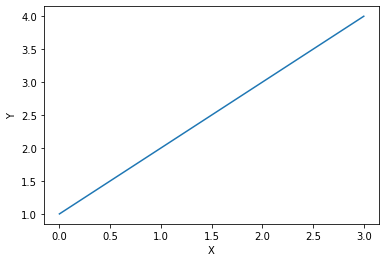

In [219]:
plt.plot([1,2,3,4])
plt.xlabel("X")
plt.ylabel('Y')

C:\Users\Okoro Chima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

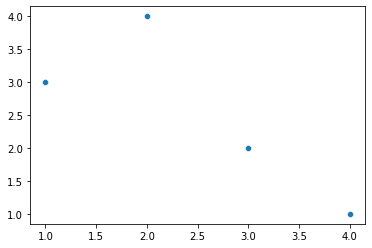

In [220]:
sns.scatterplot([1,2,3,4],[3,4,2,1])
# plt.style.use('fivethirty')

In [221]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [222]:
data.applymap(lambda x: x * 2).head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Cost Price,List Price,Quantity,Discount Percent
0,2,01-03-202301-03-2023,Second ClassSecond Class,ConsumerConsumer,United StatesUnited States,HendersonHenderson,KentuckyKentucky,84840,SouthSouth,FurnitureFurniture,BookcasesBookcases,FUR-BO-10001798FUR-BO-10001798,480,520,4,4
1,4,15-08-202315-08-2023,Second ClassSecond Class,ConsumerConsumer,United StatesUnited States,HendersonHenderson,KentuckyKentucky,84840,SouthSouth,FurnitureFurniture,ChairsChairs,FUR-CH-10000454FUR-CH-10000454,1200,1460,6,6


In [223]:
data['Postal Code'].apply(lambda X: X*2).sort_values(ascending=False).head(2)

4852    198602
4851    198602
Name: Postal Code, dtype: int64

In [224]:
data['Ship Mode'].str.lower()

0         second class
1         second class
2         second class
3       standard class
4       standard class
             ...      
9989      second class
9990    standard class
9991    standard class
9992    standard class
9993      second class
Name: Ship Mode, Length: 9994, dtype: object

In [225]:
data.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Cost Price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [229]:
data['Sub Category'].value_counts().nlargest(3)

Binders        1523
Paper          1370
Furnishings     957
Name: Sub Category, dtype: int64

In [230]:
data.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
Cost Price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [231]:
data.isna().mean()

Order Id            0.0000
Order Date          0.0000
Ship Mode           0.0001
Segment             0.0000
Country             0.0000
City                0.0000
State               0.0000
Postal Code         0.0000
Region              0.0000
Category            0.0000
Sub Category        0.0000
Product Id          0.0000
Cost Price          0.0000
List Price          0.0000
Quantity            0.0000
Discount Percent    0.0000
dtype: float64

In [234]:
data.dropna(axis='columns').head(2)

,Order Id,Order Date,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Cost Price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
